In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
import lightgbm as lgb
from itertools import combinations

from sklearn.feature_selection import SelectKBest, f_regression
from catboost import Pool, CatBoostRegressor

In [2]:
weather = pd.read_csv('data/weather_v2.csv')
target = pd.read_csv('data/EDA_target.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols = ['temp', 'ws', 'wd', 'humid', 'landP', 'seaP', 'sfctemp']

# 5. 모델 학습 및 검증
- lgbm을 이용하여 2가지 모델 작성

 
- 1) 과거 정보를 이용해 supply, 기상정보를 예측하는 모델 (시계열 모델)

- 2) supply, 기상정보를 이용하여 smp를 예측하는 모델 (상관관계 모델)

- 1)의 모델을 이용해 supply, 기상정보를 예측한 후 2)의 모델로 smp를 예측

In [4]:
past = 29 # 최근 30일 정보를 이용하여 n일 후를 예측

In [5]:
def trans(dataset, start_index, end_index, past, future, x_columns, y_columns):
    dataset.index = range(dataset.shape[0])
    data = []
    labels = []
    
    start_index = start_index + past
    
    if end_index is None:
        end_index = dataset.shape[0]
    
    for i in range(start_index, end_index-future):
        indices = np.array(dataset.loc[i-past:i, x_columns])
        data.append(indices)
        
        labels.append(np.array(dataset.loc[i+future, y_columns]))
        
    data = np.array(data)
    data = data.reshape(data.shape[0], -1)
    labels = np.array(labels)
    labels = labels.reshape(-1)
    
    return data, labels

In [6]:
def create_model(x_train, y_train, x_val, y_val):
    params = {
        'metric': 'mae',
        'seed':7777
        }
    
    d_train = lgb.Dataset(x_train, y_train)
    d_val = lgb.Dataset(x_val, y_val)

    model = lgb.train(params, d_train, 1200, \
                      d_val, verbose_eval=100, \
                      early_stopping_rounds=200)

#     model = Lasso()
#     model.fit(x_train, y_train)

    return model

## Supply

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.63144
[200]	valid_0's l1: 3.6
Early stopping, best iteration is:
[50]	valid_0's l1: 3.53191


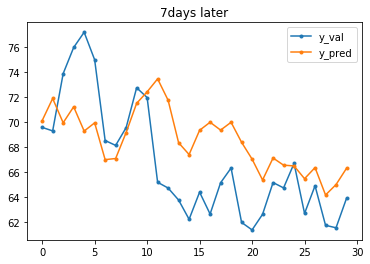

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.80367
[200]	valid_0's l1: 3.77936
Early stopping, best iteration is:
[45]	valid_0's l1: 3.75916


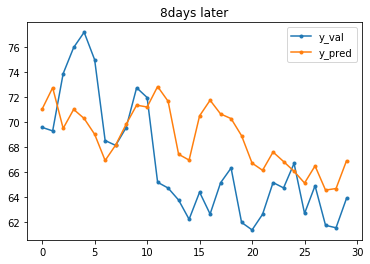

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.71688
[200]	valid_0's l1: 3.72443
Early stopping, best iteration is:
[87]	valid_0's l1: 3.70103


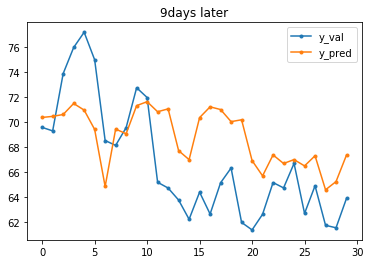

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.09253
[200]	valid_0's l1: 4.0775
Early stopping, best iteration is:
[37]	valid_0's l1: 3.95305


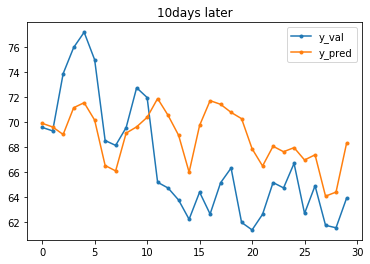

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.08719
[200]	valid_0's l1: 4.1185
Early stopping, best iteration is:
[37]	valid_0's l1: 3.93946


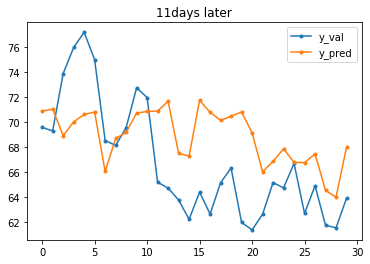

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.95023
[200]	valid_0's l1: 3.95194
Early stopping, best iteration is:
[36]	valid_0's l1: 3.90443


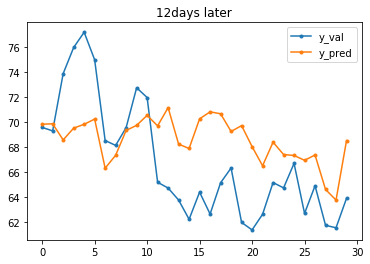

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.12967
[200]	valid_0's l1: 4.13592
Early stopping, best iteration is:
[31]	valid_0's l1: 3.90702


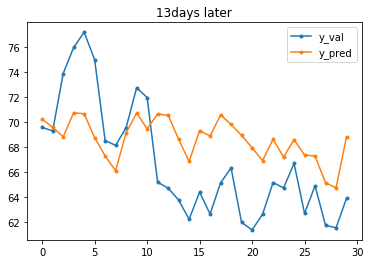

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.27769
[200]	valid_0's l1: 4.29048
Early stopping, best iteration is:
[30]	valid_0's l1: 4.09995


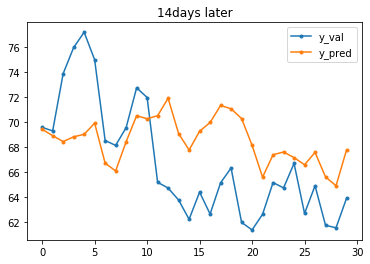

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.41566
[200]	valid_0's l1: 4.39629
Early stopping, best iteration is:
[24]	valid_0's l1: 4.21254


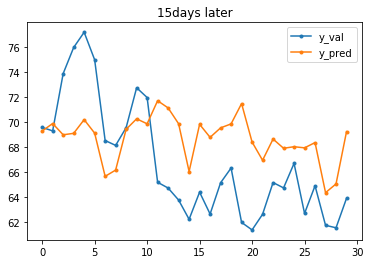

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.27827
[200]	valid_0's l1: 4.33025
Early stopping, best iteration is:
[44]	valid_0's l1: 4.14832


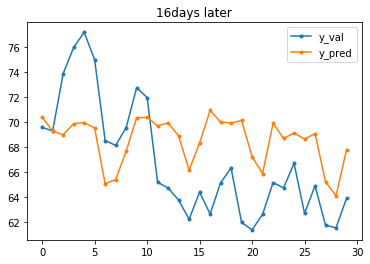

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.32289
[200]	valid_0's l1: 4.32229
Early stopping, best iteration is:
[35]	valid_0's l1: 4.2124


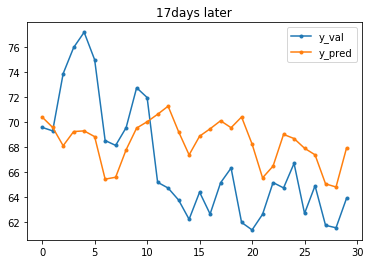

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.4979
[200]	valid_0's l1: 4.49383
Early stopping, best iteration is:
[38]	valid_0's l1: 4.40907


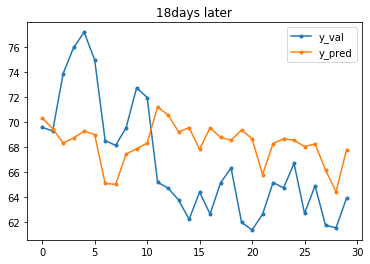

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.29454
[200]	valid_0's l1: 4.29644
Early stopping, best iteration is:
[24]	valid_0's l1: 4.24078


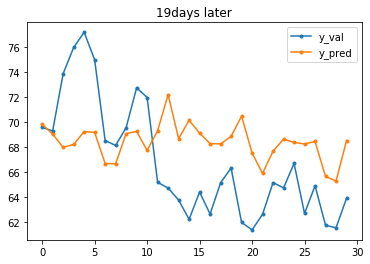

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.95484
[200]	valid_0's l1: 3.9628
Early stopping, best iteration is:
[32]	valid_0's l1: 3.91206


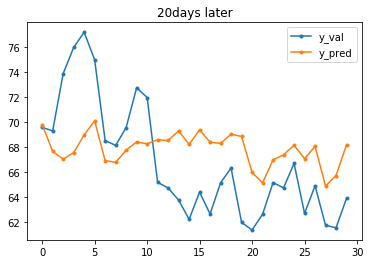

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.96568
[200]	valid_0's l1: 3.97709
Early stopping, best iteration is:
[34]	valid_0's l1: 3.86045


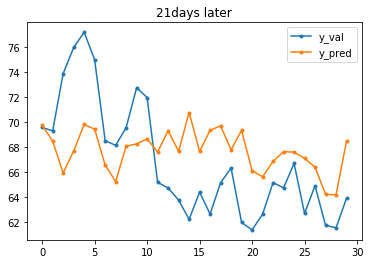

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.30311
[200]	valid_0's l1: 4.31377
Early stopping, best iteration is:
[36]	valid_0's l1: 4.22529


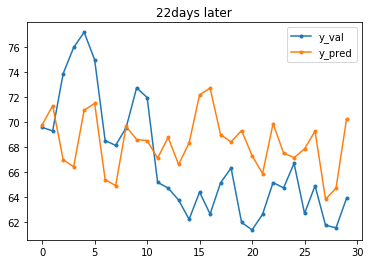

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.211
[200]	valid_0's l1: 4.16927
Early stopping, best iteration is:
[40]	valid_0's l1: 4.12258


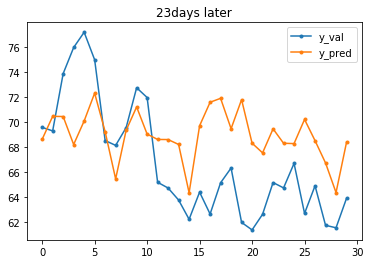

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.2179
[200]	valid_0's l1: 4.15457
Early stopping, best iteration is:
[40]	valid_0's l1: 4.11103


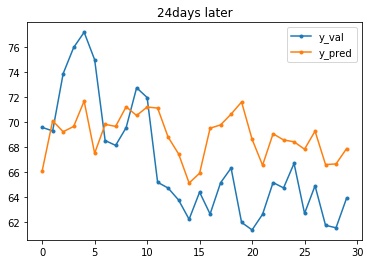

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 4.00833
[200]	valid_0's l1: 3.98959
[300]	valid_0's l1: 3.96429
[400]	valid_0's l1: 3.95389
[500]	valid_0's l1: 3.94913
[600]	valid_0's l1: 3.94585
[700]	valid_0's l1: 3.94256
[800]	valid_0's l1: 3.94065
[900]	valid_0's l1: 3.93855
[1000]	valid_0's l1: 3.93708
[1100]	valid_0's l1: 3.93593
[1200]	valid_0's l1: 3.93489
Did not meet early stopping. Best iteration is:
[1197]	valid_0's l1: 3.93484


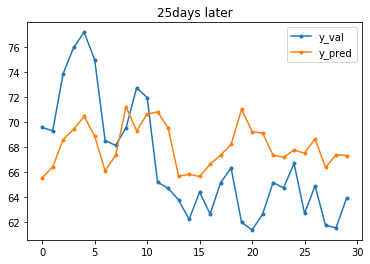

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.66784
[200]	valid_0's l1: 3.65111
[300]	valid_0's l1: 3.63069
[400]	valid_0's l1: 3.61989
[500]	valid_0's l1: 3.61411
[600]	valid_0's l1: 3.60863
[700]	valid_0's l1: 3.60508
[800]	valid_0's l1: 3.60348
[900]	valid_0's l1: 3.6013
[1000]	valid_0's l1: 3.59972
[1100]	valid_0's l1: 3.59854
[1200]	valid_0's l1: 3.59788
Did not meet early stopping. Best iteration is:
[1200]	valid_0's l1: 3.59788


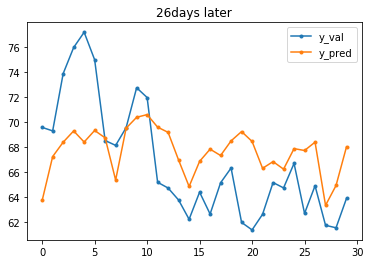

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.62727
[200]	valid_0's l1: 3.62942
Early stopping, best iteration is:
[54]	valid_0's l1: 3.596


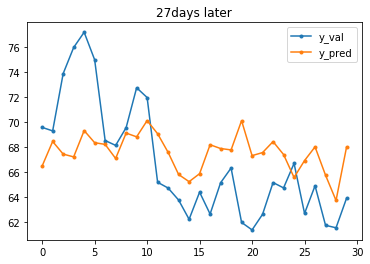

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.44309
[200]	valid_0's l1: 3.42418
[300]	valid_0's l1: 3.40574
[400]	valid_0's l1: 3.40032
[500]	valid_0's l1: 3.39416
[600]	valid_0's l1: 3.38894
[700]	valid_0's l1: 3.38515
[800]	valid_0's l1: 3.38214
[900]	valid_0's l1: 3.38001
[1000]	valid_0's l1: 3.37831
[1100]	valid_0's l1: 3.37719
[1200]	valid_0's l1: 3.3765
Did not meet early stopping. Best iteration is:
[1199]	valid_0's l1: 3.37647


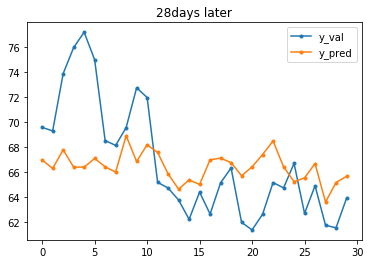

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.63089
[200]	valid_0's l1: 3.6186
Early stopping, best iteration is:
[69]	valid_0's l1: 3.58111


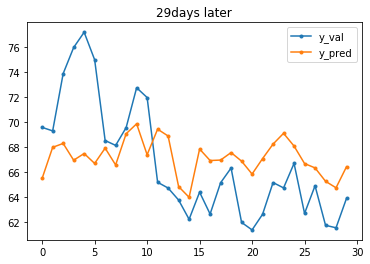

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.02328
[200]	valid_0's l1: 2.99875
[300]	valid_0's l1: 2.97337
[400]	valid_0's l1: 2.95252
[500]	valid_0's l1: 2.94123
[600]	valid_0's l1: 2.93282
[700]	valid_0's l1: 2.92797
[800]	valid_0's l1: 2.92491
[900]	valid_0's l1: 2.9222
[1000]	valid_0's l1: 2.92019
[1100]	valid_0's l1: 2.91896
[1200]	valid_0's l1: 2.91804
Did not meet early stopping. Best iteration is:
[1200]	valid_0's l1: 2.91804


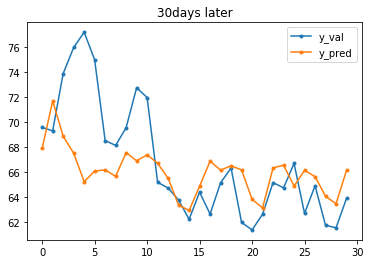

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.12493
[200]	valid_0's l1: 3.12631
Early stopping, best iteration is:
[95]	valid_0's l1: 3.11371


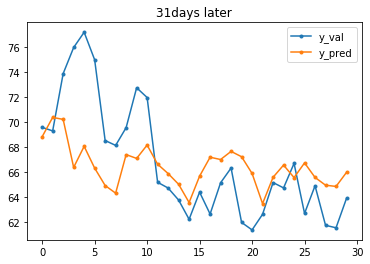

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 3.28892
[200]	valid_0's l1: 3.29629
Early stopping, best iteration is:
[51]	valid_0's l1: 3.21967


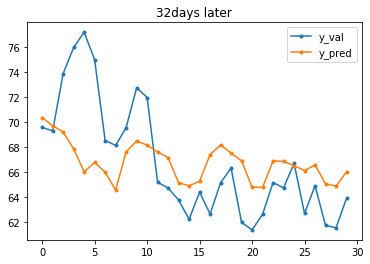

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 2.75443
[200]	valid_0's l1: 2.79171
Early stopping, best iteration is:
[60]	valid_0's l1: 2.71773


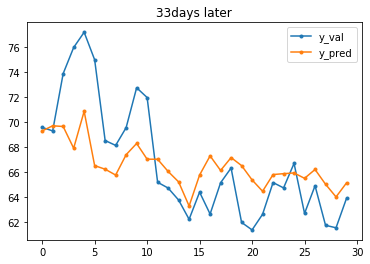

Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 2.68973
[200]	valid_0's l1: 2.71998
Early stopping, best iteration is:
[45]	valid_0's l1: 2.66407


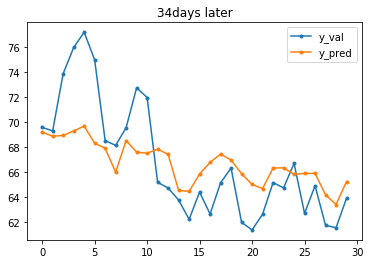

In [7]:
# x_columns = ['ws_mean', 'humid_mean', 'landP_mean', 'seaP_mean', 'sfctemp_mean', \
#              'stand_temp_max', 'stand_temp_min', 'stand_temp_mean', \
#              'year', 'month', 'day', 'dayofweek']
x_columns = ['landP_mean', 'seaP_mean', 'sfctemp_mean', \
             'stand_temp_max', 'stand_temp_min', 'stand_temp_mean', \
             'year', 'month', 'day', 'dayofweek']

y_columns = ['supply']
supply_models = {}
best_scores = []
average_scores = []

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30 # 마지막 30일을 validation set으로 사용
    x_train, y_train = trans(target, 0, train_split, past, future, x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, x_columns, y_columns)

    supply_models[future] = create_model(x_train, y_train, x_val, y_val)
    
    pred = supply_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    best_score = dict(supply_models[future].best_score)['valid_0']['l1']
    average_score = mean_absolute_error(y_val, pred)

    best_scores.append(best_score)
    average_scores.append(average_score)
    print(best_score, "\t", average_score)
    print('==========================================================================')

In [9]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 3.748930699452742
min 2.6640742580778976
max 4.409073724835693


## temp max

In [135]:
x_columns = ['temp_max', 'temp_min', 'temp_mean', \
             'year', 'month', 'day']

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.90037
[200]	valid_0's l1: 1.88052
[300]	valid_0's l1: 1.91951
[400]	valid_0's l1: 1.92258
Early stopping, best iteration is:
[187]	valid_0's l1: 1.85048


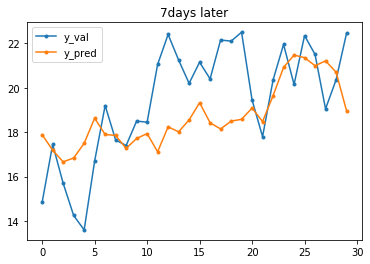

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.95199
[200]	valid_0's l1: 1.94447
[300]	valid_0's l1: 1.92741
[400]	valid_0's l1: 1.95147
[500]	valid_0's l1: 1.9179
Early stopping, best iteration is:
[261]	valid_0's l1: 1.89111


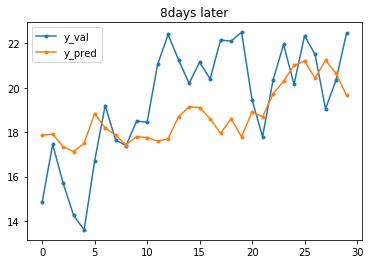

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.91902
[200]	valid_0's l1: 1.88578
[300]	valid_0's l1: 1.91236
[400]	valid_0's l1: 1.95206
[500]	valid_0's l1: 1.959
Early stopping, best iteration is:
[238]	valid_0's l1: 1.85922


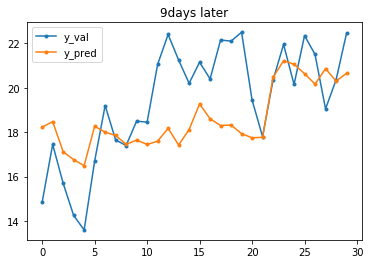

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.90835
[200]	valid_0's l1: 1.98261
[300]	valid_0's l1: 2.03411
Early stopping, best iteration is:
[94]	valid_0's l1: 1.89335


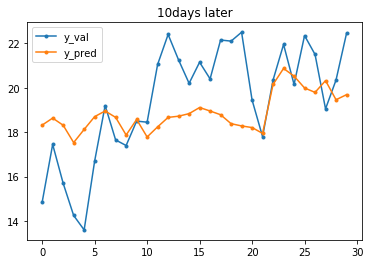

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.88387
[200]	valid_0's l1: 1.9495
[300]	valid_0's l1: 2.04004
[400]	valid_0's l1: 2.06727
Early stopping, best iteration is:
[111]	valid_0's l1: 1.8731


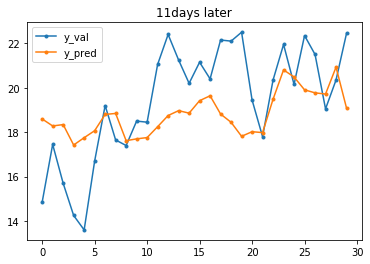

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.91645
[200]	valid_0's l1: 1.99906
[300]	valid_0's l1: 2.07828
Early stopping, best iteration is:
[94]	valid_0's l1: 1.91291


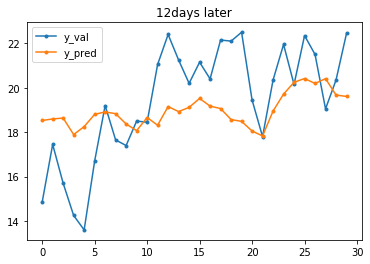

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.90748
[200]	valid_0's l1: 1.94749
[300]	valid_0's l1: 1.96095
Early stopping, best iteration is:
[96]	valid_0's l1: 1.90219


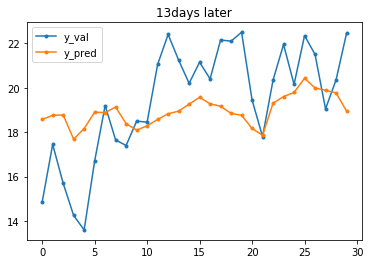

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.10062
[200]	valid_0's l1: 2.13193
[300]	valid_0's l1: 2.18393
Early stopping, best iteration is:
[31]	valid_0's l1: 2.01312


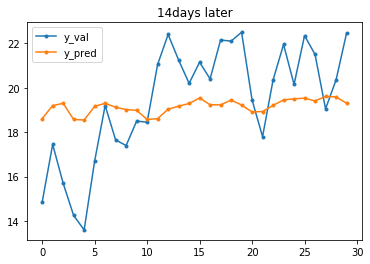

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.07133
[200]	valid_0's l1: 2.15376
[300]	valid_0's l1: 2.16908
Early stopping, best iteration is:
[31]	valid_0's l1: 1.99785


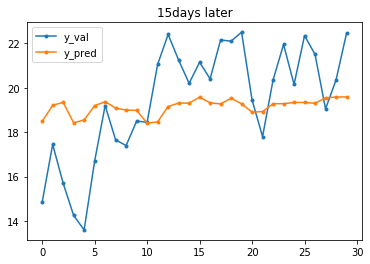

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.04824
[200]	valid_0's l1: 2.09541
[300]	valid_0's l1: 2.15857
Early stopping, best iteration is:
[27]	valid_0's l1: 2.0203


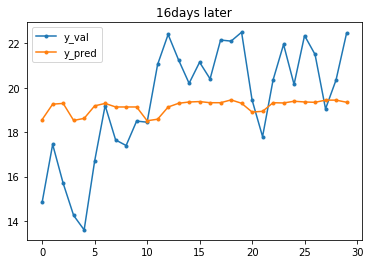

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.04213
[200]	valid_0's l1: 2.02962
[300]	valid_0's l1: 2.01692
Early stopping, best iteration is:
[32]	valid_0's l1: 2.00485


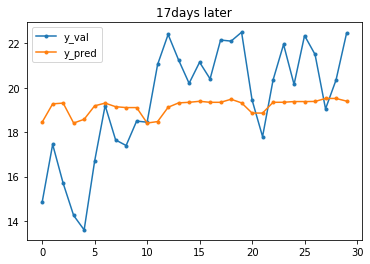

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.10583
[200]	valid_0's l1: 2.1364
[300]	valid_0's l1: 2.20844
Early stopping, best iteration is:
[19]	valid_0's l1: 2.05642


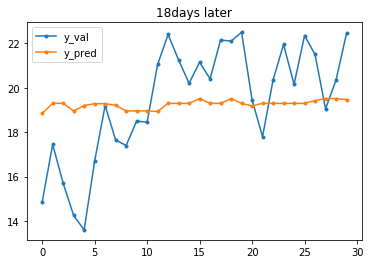

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.01943
[200]	valid_0's l1: 2.00463
[300]	valid_0's l1: 1.98844
Early stopping, best iteration is:
[41]	valid_0's l1: 1.90293


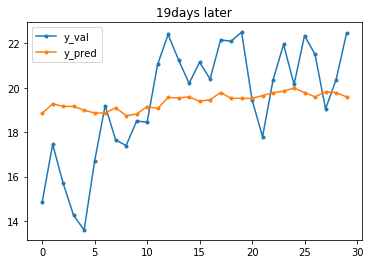

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.0497
[200]	valid_0's l1: 2.09754
[300]	valid_0's l1: 2.11287
Early stopping, best iteration is:
[63]	valid_0's l1: 1.97007


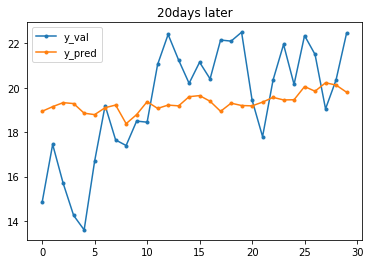

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.93884
[200]	valid_0's l1: 1.91718
[300]	valid_0's l1: 1.95159
[400]	valid_0's l1: 1.97368
[500]	valid_0's l1: 1.96167
Early stopping, best iteration is:
[202]	valid_0's l1: 1.91479


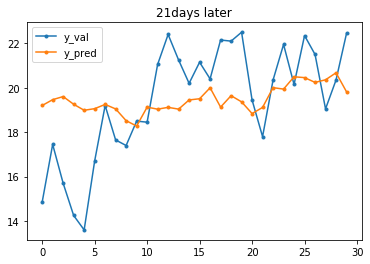

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.00228
[200]	valid_0's l1: 1.90066
[300]	valid_0's l1: 1.88092
[400]	valid_0's l1: 1.89746
[500]	valid_0's l1: 1.91631
[600]	valid_0's l1: 1.89279
Early stopping, best iteration is:
[307]	valid_0's l1: 1.8765


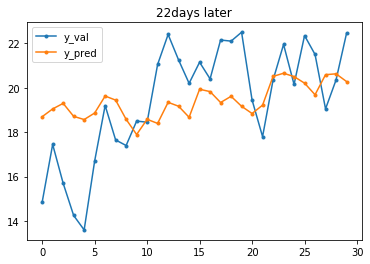

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.83365
[200]	valid_0's l1: 1.80326
[300]	valid_0's l1: 1.8104
[400]	valid_0's l1: 1.78938
[500]	valid_0's l1: 1.77182
[600]	valid_0's l1: 1.77296
[700]	valid_0's l1: 1.7791
[800]	valid_0's l1: 1.77391
[900]	valid_0's l1: 1.77968
Early stopping, best iteration is:
[622]	valid_0's l1: 1.76963


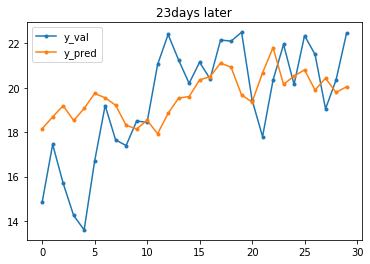

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.79753
[200]	valid_0's l1: 1.72028
[300]	valid_0's l1: 1.70893
[400]	valid_0's l1: 1.68706
[500]	valid_0's l1: 1.67478
[600]	valid_0's l1: 1.66815
[700]	valid_0's l1: 1.66288
[800]	valid_0's l1: 1.66574
[900]	valid_0's l1: 1.67486
Early stopping, best iteration is:
[697]	valid_0's l1: 1.66122


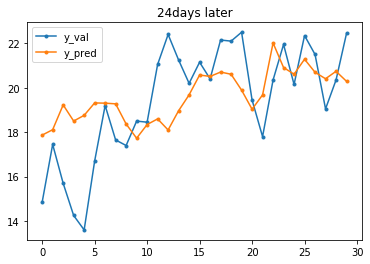

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.92431
[200]	valid_0's l1: 1.88476
[300]	valid_0's l1: 1.85992
[400]	valid_0's l1: 1.81854
[500]	valid_0's l1: 1.80746
[600]	valid_0's l1: 1.81489
[700]	valid_0's l1: 1.82082
[800]	valid_0's l1: 1.825
Early stopping, best iteration is:
[535]	valid_0's l1: 1.80125


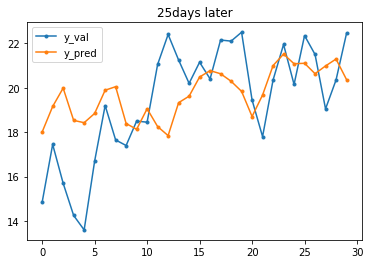

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.88644
[200]	valid_0's l1: 1.83195
[300]	valid_0's l1: 1.85077
[400]	valid_0's l1: 1.81546
[500]	valid_0's l1: 1.82584
[600]	valid_0's l1: 1.83199
Early stopping, best iteration is:
[382]	valid_0's l1: 1.80345


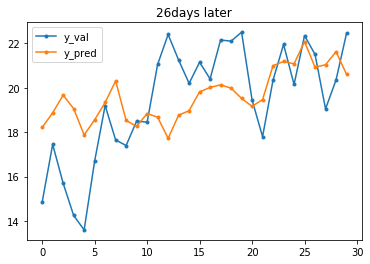

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.8782
[200]	valid_0's l1: 1.85653
[300]	valid_0's l1: 1.86853
[400]	valid_0's l1: 1.81228
[500]	valid_0's l1: 1.79479
[600]	valid_0's l1: 1.78119
[700]	valid_0's l1: 1.79261
[800]	valid_0's l1: 1.80415
Early stopping, best iteration is:
[598]	valid_0's l1: 1.78034


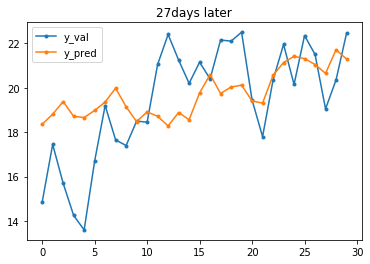

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.90365
[200]	valid_0's l1: 1.85956
[300]	valid_0's l1: 1.87555
[400]	valid_0's l1: 1.83376
[500]	valid_0's l1: 1.80347
[600]	valid_0's l1: 1.79026
[700]	valid_0's l1: 1.77385
[800]	valid_0's l1: 1.76639
[900]	valid_0's l1: 1.76718
[1000]	valid_0's l1: 1.76986
[1100]	valid_0's l1: 1.77077
Early stopping, best iteration is:
[853]	valid_0's l1: 1.76455


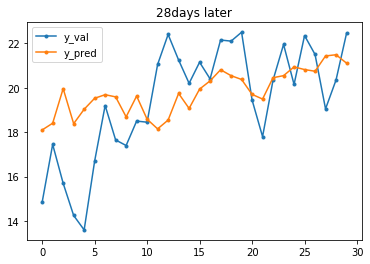

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.85706
[200]	valid_0's l1: 1.82802
[300]	valid_0's l1: 1.83277
[400]	valid_0's l1: 1.79223
[500]	valid_0's l1: 1.76854
[600]	valid_0's l1: 1.73862
[700]	valid_0's l1: 1.72373
[800]	valid_0's l1: 1.7144
[900]	valid_0's l1: 1.70626
[1000]	valid_0's l1: 1.70703
[1100]	valid_0's l1: 1.70702
[1200]	valid_0's l1: 1.70628
Did not meet early stopping. Best iteration is:
[930]	valid_0's l1: 1.7039


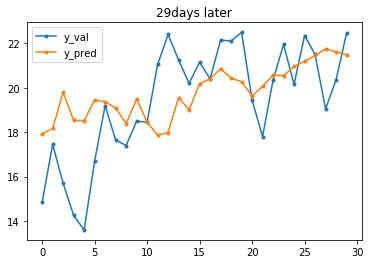

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.97065
[200]	valid_0's l1: 1.92716
[300]	valid_0's l1: 1.95573
[400]	valid_0's l1: 1.90741
[500]	valid_0's l1: 1.86632
[600]	valid_0's l1: 1.8644
[700]	valid_0's l1: 1.87445
[800]	valid_0's l1: 1.86645
Early stopping, best iteration is:
[564]	valid_0's l1: 1.85316


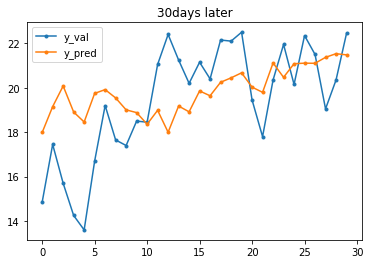

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.97584
[200]	valid_0's l1: 1.92218
[300]	valid_0's l1: 1.90135
[400]	valid_0's l1: 1.84152
[500]	valid_0's l1: 1.80947
[600]	valid_0's l1: 1.76765
[700]	valid_0's l1: 1.75732
[800]	valid_0's l1: 1.75705
[900]	valid_0's l1: 1.76002
[1000]	valid_0's l1: 1.74949
[1100]	valid_0's l1: 1.75322
[1200]	valid_0's l1: 1.75597
Did not meet early stopping. Best iteration is:
[1018]	valid_0's l1: 1.74883


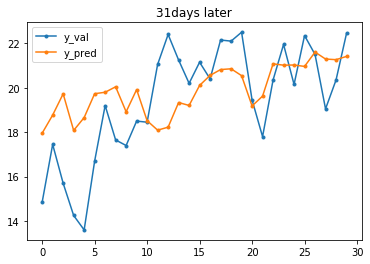

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.91162
[200]	valid_0's l1: 1.87104
[300]	valid_0's l1: 1.87743
[400]	valid_0's l1: 1.82115
[500]	valid_0's l1: 1.77605
[600]	valid_0's l1: 1.73482
[700]	valid_0's l1: 1.71748
[800]	valid_0's l1: 1.70397
[900]	valid_0's l1: 1.69651
[1000]	valid_0's l1: 1.70105
[1100]	valid_0's l1: 1.69934
Early stopping, best iteration is:
[884]	valid_0's l1: 1.69422


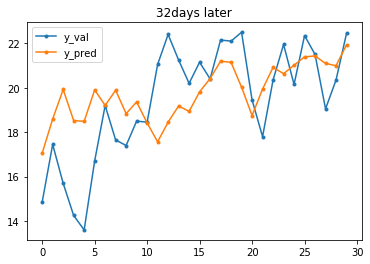

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.85893
[200]	valid_0's l1: 1.84097
[300]	valid_0's l1: 1.85536
[400]	valid_0's l1: 1.82995
[500]	valid_0's l1: 1.82008
[600]	valid_0's l1: 1.80149
[700]	valid_0's l1: 1.78576
[800]	valid_0's l1: 1.76859
[900]	valid_0's l1: 1.76308
[1000]	valid_0's l1: 1.75824
[1100]	valid_0's l1: 1.75773
[1200]	valid_0's l1: 1.75415
Did not meet early stopping. Best iteration is:
[1158]	valid_0's l1: 1.7535


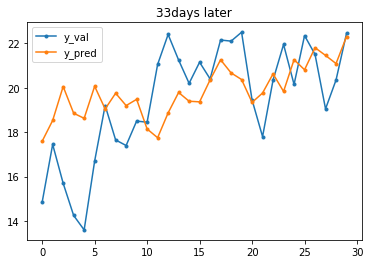

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.85667
[200]	valid_0's l1: 1.86205
[300]	valid_0's l1: 1.90137
[400]	valid_0's l1: 1.89426
Early stopping, best iteration is:
[137]	valid_0's l1: 1.81726


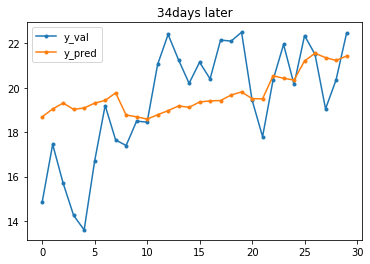

In [136]:
y_columns = ['temp_max']
temp_max_models = {}
scores = list()

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, x_columns, y_columns)
    
    temp_max_models[future] = create_model(x_train, y_train, x_val, y_val)
        
    pred = temp_max_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(temp_max_models[future].best_score)['valid_0']['l1']
#     score = mean_absolute_error(y_val, pred)

    scores.append(score)
#     print(score)
    print('==========================================================================')

In [138]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.8603741200562538
min 1.6612226447586833
max 2.0564174112197064


## temp min

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.10936
[200]	valid_0's l1: 2.0872
[300]	valid_0's l1: 2.08966
[400]	valid_0's l1: 2.10207
[500]	valid_0's l1: 2.10254
Early stopping, best iteration is:
[238]	valid_0's l1: 2.07733


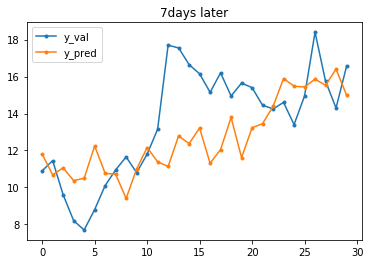

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.13681
[200]	valid_0's l1: 2.15787
[300]	valid_0's l1: 2.21564
Early stopping, best iteration is:
[61]	valid_0's l1: 2.12265


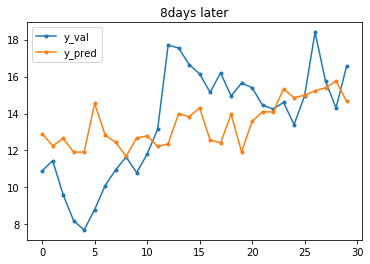

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.16638
[200]	valid_0's l1: 2.13941
[300]	valid_0's l1: 2.16432
[400]	valid_0's l1: 2.20759
[500]	valid_0's l1: 2.24976
Early stopping, best iteration is:
[225]	valid_0's l1: 2.12578


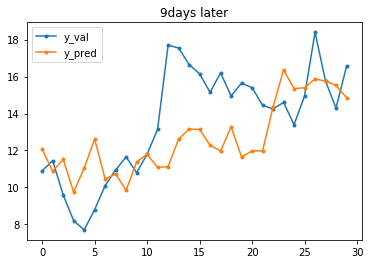

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.12484
[200]	valid_0's l1: 2.11603
[300]	valid_0's l1: 2.09305
[400]	valid_0's l1: 2.14135
[500]	valid_0's l1: 2.17767
Early stopping, best iteration is:
[278]	valid_0's l1: 2.07756


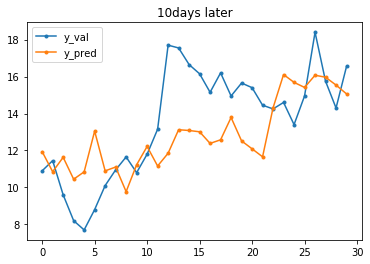

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.06458
[200]	valid_0's l1: 2.05222
[300]	valid_0's l1: 2.05013
[400]	valid_0's l1: 2.10331
[500]	valid_0's l1: 2.09763
Early stopping, best iteration is:
[260]	valid_0's l1: 2.03434


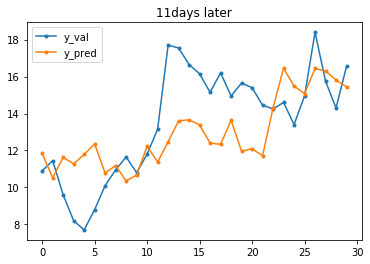

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.13221
[200]	valid_0's l1: 2.17779
[300]	valid_0's l1: 2.2842
[400]	valid_0's l1: 2.3153
Early stopping, best iteration is:
[103]	valid_0's l1: 2.12995


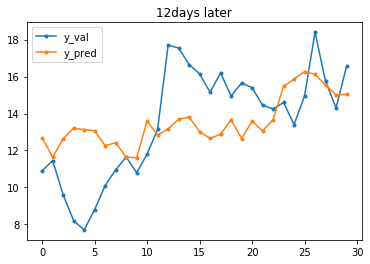

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.1732
[200]	valid_0's l1: 2.20298
[300]	valid_0's l1: 2.31926
[400]	valid_0's l1: 2.41004
Early stopping, best iteration is:
[121]	valid_0's l1: 2.13509


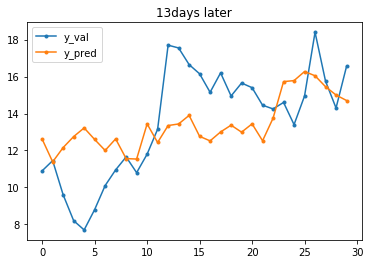

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.25246
[200]	valid_0's l1: 2.27676
[300]	valid_0's l1: 2.35388
[400]	valid_0's l1: 2.41512
Early stopping, best iteration is:
[134]	valid_0's l1: 2.18673


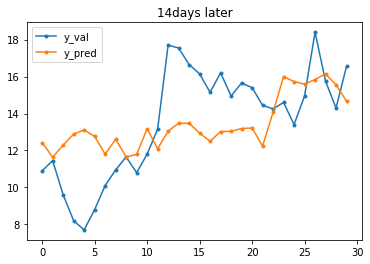

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.22235
[200]	valid_0's l1: 2.11536
[300]	valid_0's l1: 2.17607
[400]	valid_0's l1: 2.22975
[500]	valid_0's l1: 2.20784
Early stopping, best iteration is:
[208]	valid_0's l1: 2.11508


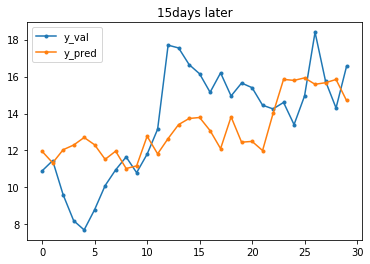

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.18201
[200]	valid_0's l1: 2.11034
[300]	valid_0's l1: 2.15697
[400]	valid_0's l1: 2.23987
[500]	valid_0's l1: 2.27337
Early stopping, best iteration is:
[215]	valid_0's l1: 2.09419


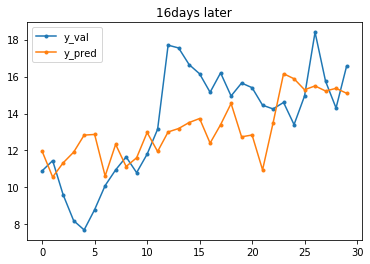

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.2759
[200]	valid_0's l1: 2.27401
[300]	valid_0's l1: 2.3463
[400]	valid_0's l1: 2.4177
Early stopping, best iteration is:
[114]	valid_0's l1: 2.24361


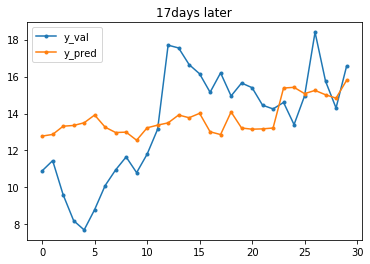

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.46833
[200]	valid_0's l1: 2.42706
[300]	valid_0's l1: 2.47499
Early stopping, best iteration is:
[20]	valid_0's l1: 2.4096


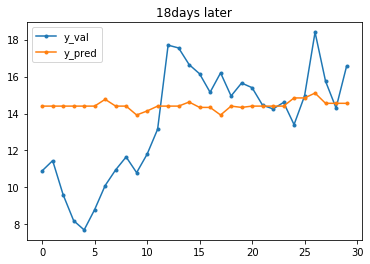

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.39636
[200]	valid_0's l1: 2.43212
[300]	valid_0's l1: 2.5096
Early stopping, best iteration is:
[46]	valid_0's l1: 2.37293


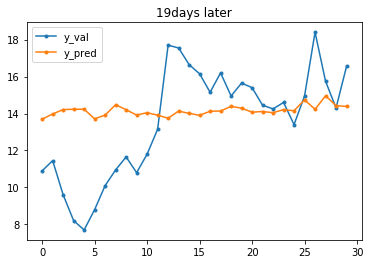

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.39279
[200]	valid_0's l1: 2.37935
[300]	valid_0's l1: 2.43906
[400]	valid_0's l1: 2.50284
Early stopping, best iteration is:
[131]	valid_0's l1: 2.37407


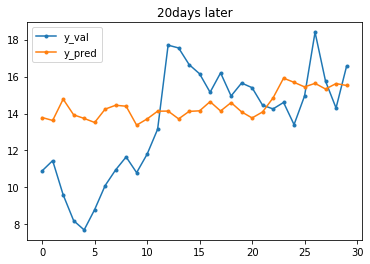

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.3895
[200]	valid_0's l1: 2.39579
[300]	valid_0's l1: 2.34759
[400]	valid_0's l1: 2.38937
[500]	valid_0's l1: 2.42034
Early stopping, best iteration is:
[266]	valid_0's l1: 2.344


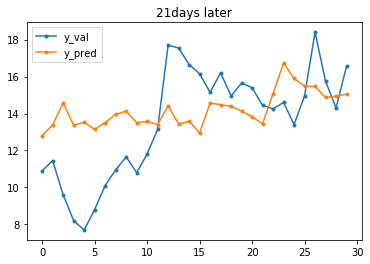

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.32238
[200]	valid_0's l1: 2.35859
[300]	valid_0's l1: 2.39363
[400]	valid_0's l1: 2.43006
Early stopping, best iteration is:
[144]	valid_0's l1: 2.31713


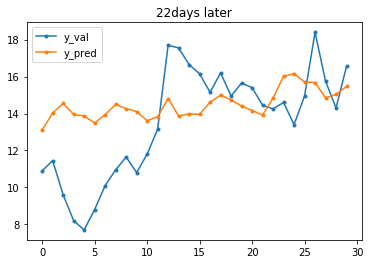

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.32869
[200]	valid_0's l1: 2.31462
[300]	valid_0's l1: 2.37455
[400]	valid_0's l1: 2.36642
Early stopping, best iteration is:
[168]	valid_0's l1: 2.29563


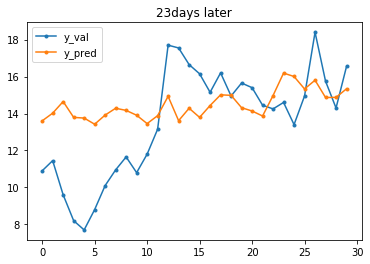

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.32204
[200]	valid_0's l1: 2.32229
[300]	valid_0's l1: 2.33721
[400]	valid_0's l1: 2.33807
Early stopping, best iteration is:
[130]	valid_0's l1: 2.31761


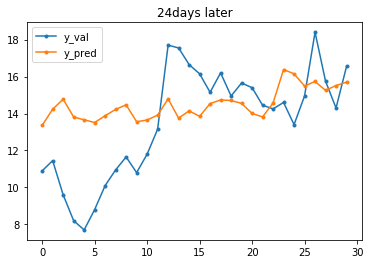

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.33052
[200]	valid_0's l1: 2.26211
[300]	valid_0's l1: 2.28896
[400]	valid_0's l1: 2.29375
[500]	valid_0's l1: 2.25507
Early stopping, best iteration is:
[244]	valid_0's l1: 2.23134


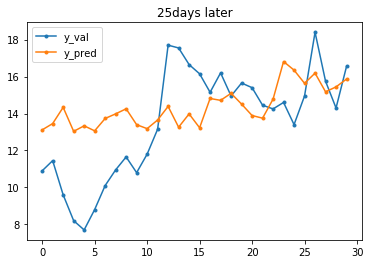

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.28034
[200]	valid_0's l1: 2.31455
[300]	valid_0's l1: 2.36596
[400]	valid_0's l1: 2.3856
Early stopping, best iteration is:
[117]	valid_0's l1: 2.26607


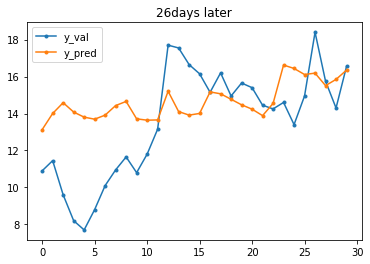

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.2612
[200]	valid_0's l1: 2.30039
[300]	valid_0's l1: 2.2981
Early stopping, best iteration is:
[95]	valid_0's l1: 2.26031


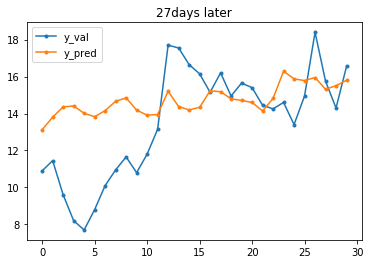

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.20072
[200]	valid_0's l1: 2.24175
[300]	valid_0's l1: 2.26827
[400]	valid_0's l1: 2.22942
Early stopping, best iteration is:
[118]	valid_0's l1: 2.1881


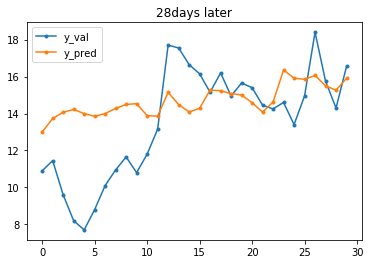

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.25541
[200]	valid_0's l1: 2.29639
[300]	valid_0's l1: 2.28329
[400]	valid_0's l1: 2.25161
[500]	valid_0's l1: 2.22304
[600]	valid_0's l1: 2.21388
[700]	valid_0's l1: 2.21225
Early stopping, best iteration is:
[445]	valid_0's l1: 2.21054


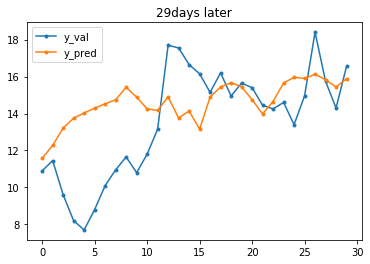

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.23951
[200]	valid_0's l1: 2.2546
[300]	valid_0's l1: 2.27345
[400]	valid_0's l1: 2.23896
Early stopping, best iteration is:
[145]	valid_0's l1: 2.21552


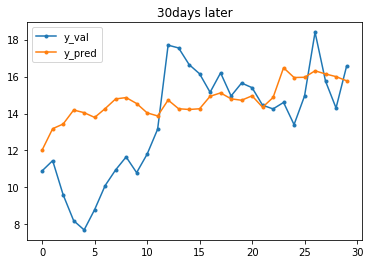

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.29183
[200]	valid_0's l1: 2.17469
[300]	valid_0's l1: 2.18221
[400]	valid_0's l1: 2.13945
[500]	valid_0's l1: 2.12534
[600]	valid_0's l1: 2.1305
[700]	valid_0's l1: 2.13805
Early stopping, best iteration is:
[448]	valid_0's l1: 2.12034


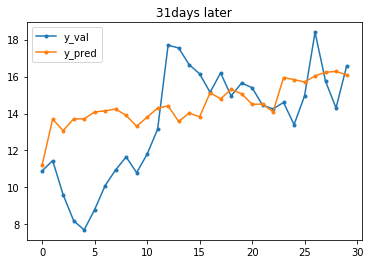

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.38146
[200]	valid_0's l1: 2.28843
[300]	valid_0's l1: 2.26836
[400]	valid_0's l1: 2.2026
[500]	valid_0's l1: 2.2234
[600]	valid_0's l1: 2.20588
[700]	valid_0's l1: 2.20019
[800]	valid_0's l1: 2.20808
[900]	valid_0's l1: 2.2195
[1000]	valid_0's l1: 2.22321
Early stopping, best iteration is:
[705]	valid_0's l1: 2.20019


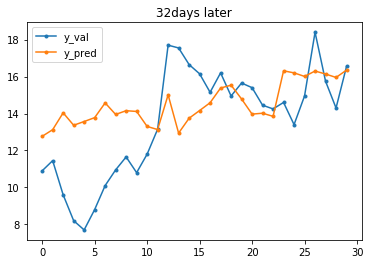

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.30802
[200]	valid_0's l1: 2.20233
[300]	valid_0's l1: 2.22314
[400]	valid_0's l1: 2.2513
[500]	valid_0's l1: 2.26575
Early stopping, best iteration is:
[226]	valid_0's l1: 2.18315


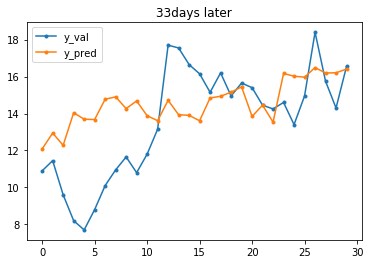

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.37892
[200]	valid_0's l1: 2.21003
[300]	valid_0's l1: 2.21317
[400]	valid_0's l1: 2.19446
[500]	valid_0's l1: 2.19158
[600]	valid_0's l1: 2.20269
Early stopping, best iteration is:
[356]	valid_0's l1: 2.1884


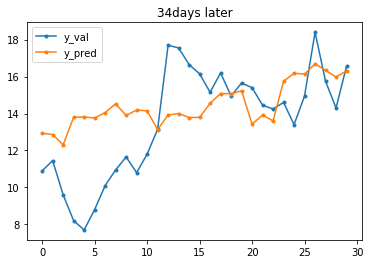

In [139]:
y_columns = ['temp_min']
temp_min_models = {}
scores = list()

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, x_columns, y_columns)
    
    d_train = lgb.Dataset(x_train, y_train)
    d_val = lgb.Dataset(x_val, y_val)

    temp_min_models[future] = create_model(x_train, y_train, x_val, y_val)
        
    pred = temp_min_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(temp_max_models[future].best_score)['valid_0']['l1']

    scores.append(score)
    print('==========================================================================')

In [140]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.8603741200562538
min 1.6612226447586833
max 2.0564174112197064


# temp mean

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.01718
[200]	valid_0's l1: 2.05206
[300]	valid_0's l1: 2.18149
Early stopping, best iteration is:
[55]	valid_0's l1: 1.95814


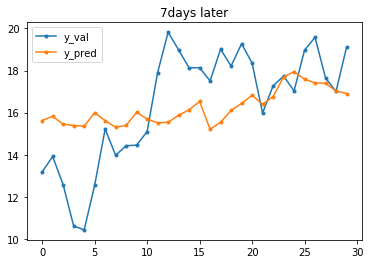

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.0836
[200]	valid_0's l1: 2.02876
[300]	valid_0's l1: 2.06813
[400]	valid_0's l1: 2.12597
[500]	valid_0's l1: 2.12737
Early stopping, best iteration is:
[218]	valid_0's l1: 2.02316


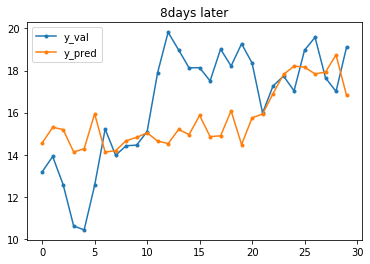

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.9483
[200]	valid_0's l1: 1.89228
[300]	valid_0's l1: 1.91073
[400]	valid_0's l1: 1.96053
Early stopping, best iteration is:
[179]	valid_0's l1: 1.88891


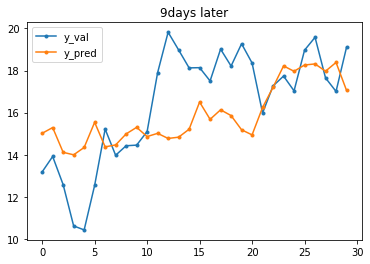

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.99967
[200]	valid_0's l1: 1.9863
[300]	valid_0's l1: 2.03452
[400]	valid_0's l1: 2.11359
Early stopping, best iteration is:
[167]	valid_0's l1: 1.96124


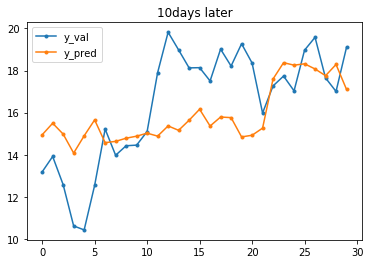

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.96284
[200]	valid_0's l1: 1.9978
[300]	valid_0's l1: 2.02299
[400]	valid_0's l1: 2.06117
Early stopping, best iteration is:
[108]	valid_0's l1: 1.94907


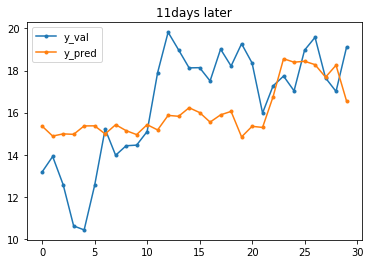

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.9976
[200]	valid_0's l1: 1.98809
[300]	valid_0's l1: 1.99049
Early stopping, best iteration is:
[80]	valid_0's l1: 1.97027


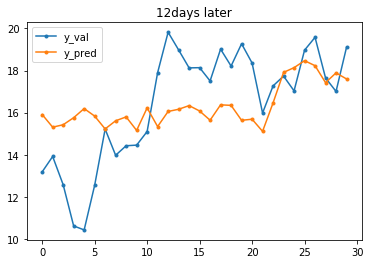

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.97855
[200]	valid_0's l1: 2.00355
[300]	valid_0's l1: 2.0691
Early stopping, best iteration is:
[82]	valid_0's l1: 1.94862


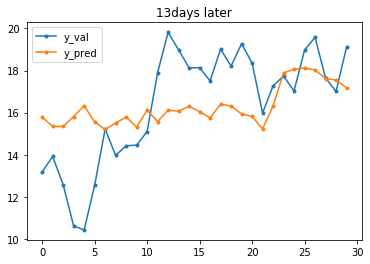

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.92852
[200]	valid_0's l1: 2.03539
[300]	valid_0's l1: 2.13695
Early stopping, best iteration is:
[74]	valid_0's l1: 1.92256


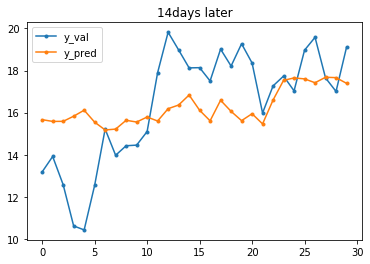

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.99844
[200]	valid_0's l1: 2.05502
[300]	valid_0's l1: 2.19617
Early stopping, best iteration is:
[44]	valid_0's l1: 1.98905


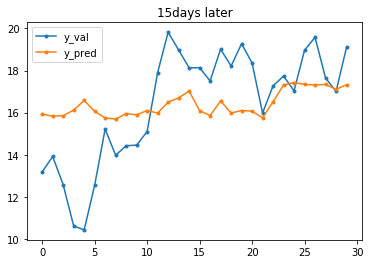

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.97845
[200]	valid_0's l1: 2.04621
[300]	valid_0's l1: 2.16768
Early stopping, best iteration is:
[92]	valid_0's l1: 1.97176


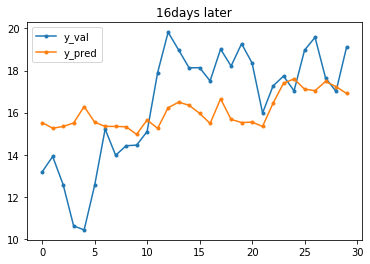

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.06264
[200]	valid_0's l1: 2.10291
[300]	valid_0's l1: 2.18811
Early stopping, best iteration is:
[38]	valid_0's l1: 2.02273


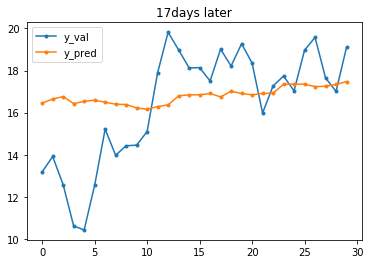

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.13123
[200]	valid_0's l1: 2.14355
[300]	valid_0's l1: 2.18251
[400]	valid_0's l1: 2.21995
Early stopping, best iteration is:
[120]	valid_0's l1: 2.12018


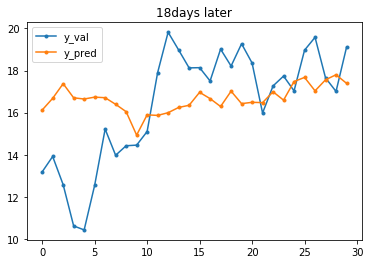

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.11834
[200]	valid_0's l1: 2.20157
[300]	valid_0's l1: 2.23608
Early stopping, best iteration is:
[93]	valid_0's l1: 2.10817


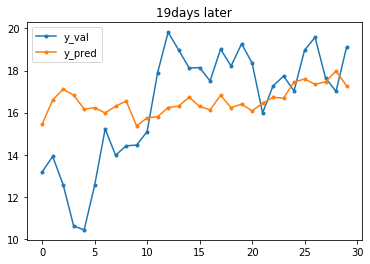

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.09064
[200]	valid_0's l1: 2.10173
[300]	valid_0's l1: 2.10603
[400]	valid_0's l1: 2.1566
[500]	valid_0's l1: 2.15007
Early stopping, best iteration is:
[260]	valid_0's l1: 2.08228


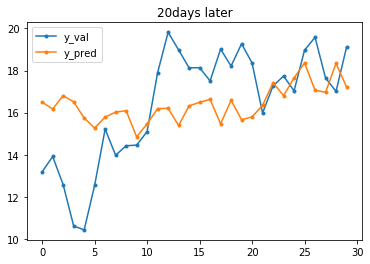

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.06674
[200]	valid_0's l1: 2.01509
[300]	valid_0's l1: 2.0226
[400]	valid_0's l1: 2.08464
[500]	valid_0's l1: 2.09763
Early stopping, best iteration is:
[233]	valid_0's l1: 2.0006


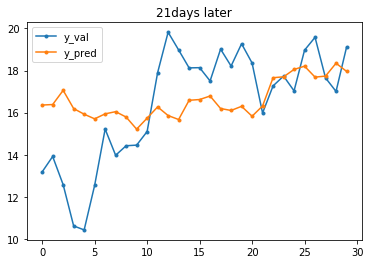

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.06183
[200]	valid_0's l1: 2.05455
[300]	valid_0's l1: 2.07566
[400]	valid_0's l1: 2.07023
Early stopping, best iteration is:
[120]	valid_0's l1: 2.03121


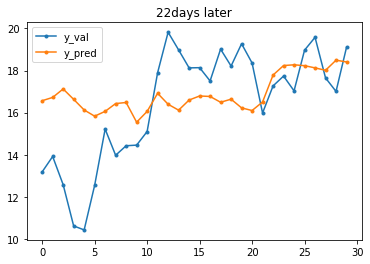

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.06453
[200]	valid_0's l1: 2.06651
[300]	valid_0's l1: 2.0843
[400]	valid_0's l1: 2.06833
Early stopping, best iteration is:
[135]	valid_0's l1: 2.03363


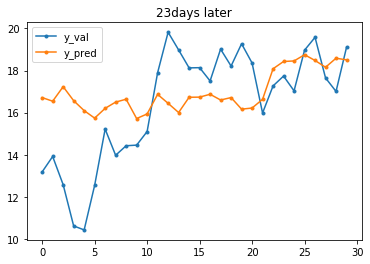

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.02911
[200]	valid_0's l1: 1.99221
[300]	valid_0's l1: 2.01019
[400]	valid_0's l1: 1.96107
[500]	valid_0's l1: 1.97016
[600]	valid_0's l1: 1.94774
[700]	valid_0's l1: 1.94494
[800]	valid_0's l1: 1.9577
[900]	valid_0's l1: 1.96524
Early stopping, best iteration is:
[660]	valid_0's l1: 1.94167


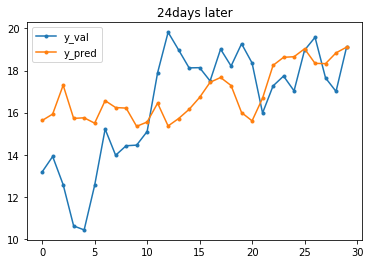

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.02898
[200]	valid_0's l1: 1.94412
[300]	valid_0's l1: 1.90607
[400]	valid_0's l1: 1.88292
[500]	valid_0's l1: 1.86741
[600]	valid_0's l1: 1.85037
[700]	valid_0's l1: 1.83403
[800]	valid_0's l1: 1.83699
[900]	valid_0's l1: 1.84779
[1000]	valid_0's l1: 1.85834
Early stopping, best iteration is:
[760]	valid_0's l1: 1.83139


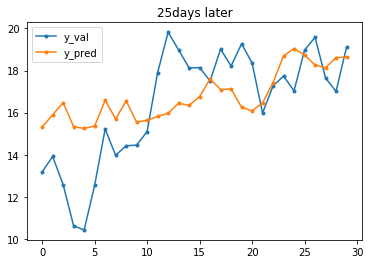

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 1.97733
[200]	valid_0's l1: 1.95944
[300]	valid_0's l1: 1.98376
[400]	valid_0's l1: 1.94714
[500]	valid_0's l1: 1.9408
[600]	valid_0's l1: 1.94005
[700]	valid_0's l1: 1.95636
[800]	valid_0's l1: 1.95956
Early stopping, best iteration is:
[530]	valid_0's l1: 1.93195


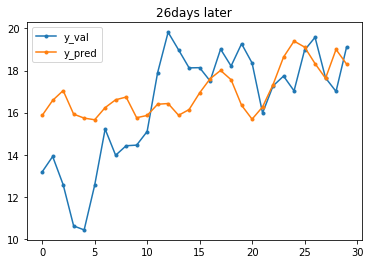

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.01709
[200]	valid_0's l1: 2.03852
[300]	valid_0's l1: 2.0607
Early stopping, best iteration is:
[93]	valid_0's l1: 2.0098


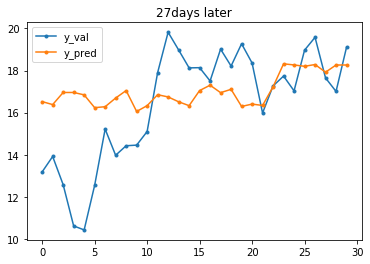

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.03336
[200]	valid_0's l1: 1.99598
[300]	valid_0's l1: 1.94025
[400]	valid_0's l1: 1.89282
[500]	valid_0's l1: 1.87585
[600]	valid_0's l1: 1.87501
[700]	valid_0's l1: 1.88378
[800]	valid_0's l1: 1.89323
Early stopping, best iteration is:
[594]	valid_0's l1: 1.87348


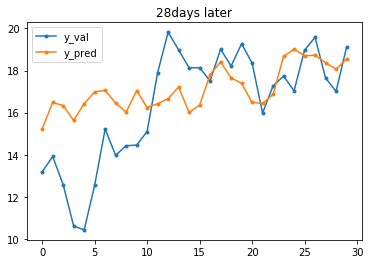

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.05246
[200]	valid_0's l1: 2.03311
[300]	valid_0's l1: 2.02506
[400]	valid_0's l1: 1.98694
[500]	valid_0's l1: 1.97496
[600]	valid_0's l1: 1.97966
[700]	valid_0's l1: 1.98295
Early stopping, best iteration is:
[489]	valid_0's l1: 1.97318


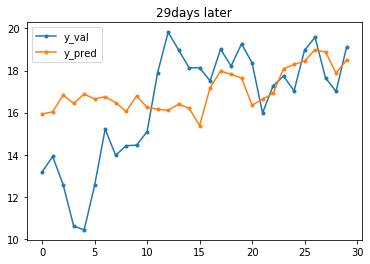

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.05946
[200]	valid_0's l1: 2.00703
[300]	valid_0's l1: 2.01764
[400]	valid_0's l1: 2.004
[500]	valid_0's l1: 1.99783
[600]	valid_0's l1: 1.99574
[700]	valid_0's l1: 1.9928
[800]	valid_0's l1: 1.99681
Early stopping, best iteration is:
[580]	valid_0's l1: 1.99037


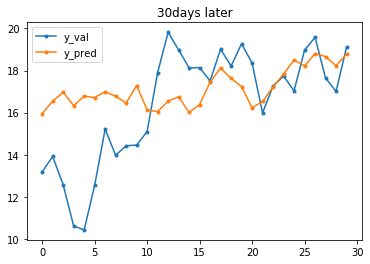

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.12903
[200]	valid_0's l1: 2.0657
[300]	valid_0's l1: 2.0397
[400]	valid_0's l1: 2.02978
[500]	valid_0's l1: 2.00998
[600]	valid_0's l1: 2.00075
[700]	valid_0's l1: 2.00877
[800]	valid_0's l1: 2.01165
Early stopping, best iteration is:
[555]	valid_0's l1: 1.99653


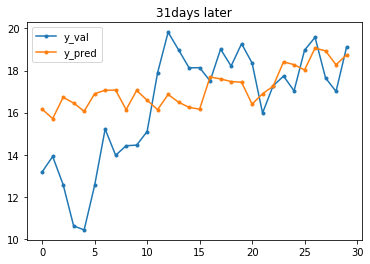

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.14411
[200]	valid_0's l1: 2.10423
[300]	valid_0's l1: 2.06776
[400]	valid_0's l1: 2.015
[500]	valid_0's l1: 1.98464
[600]	valid_0's l1: 1.96927
[700]	valid_0's l1: 1.96524
[800]	valid_0's l1: 1.96801
[900]	valid_0's l1: 1.96712
Early stopping, best iteration is:
[656]	valid_0's l1: 1.96279


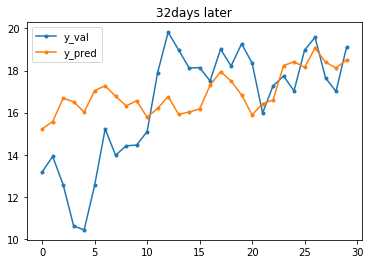

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.0763
[200]	valid_0's l1: 2.07313
[300]	valid_0's l1: 2.04032
[400]	valid_0's l1: 2.02774
[500]	valid_0's l1: 2.03057
[600]	valid_0's l1: 2.03188
Early stopping, best iteration is:
[388]	valid_0's l1: 2.0251


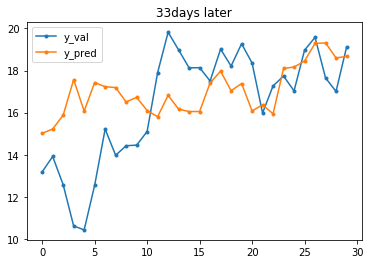

Training until validation scores don't improve for 300 rounds
[100]	valid_0's l1: 2.1471
[200]	valid_0's l1: 2.13695
[300]	valid_0's l1: 2.15679
[400]	valid_0's l1: 2.10664
[500]	valid_0's l1: 2.1231
[600]	valid_0's l1: 2.13145
Early stopping, best iteration is:
[391]	valid_0's l1: 2.10532


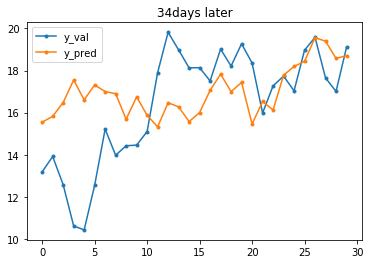

In [141]:
y_columns = ['temp_mean']
temp_mean_models = {}

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, x_columns, y_columns)
    
    d_train = lgb.Dataset(x_train, y_train)
    d_val = lgb.Dataset(x_val, y_val)

    temp_mean_models[future] = create_model(x_train, y_train, x_val, y_val)
        
    pred = temp_mean_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(temp_max_models[future].best_score)['valid_0']['l1']

    scores.append(score)
    print('==========================================================================')

In [142]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.8603741200562536
min 1.6612226447586833
max 2.0564174112197064


### 'ws_mean', 'humid_mean', 'landP_mean', 'seaP_mean', 'sfctemp_mean'

In [38]:
x_test = np.array(target.loc[700:, ['year', 'month', 'day', 'dayofweek', 'supply', 'temp_max', 'temp_min', 'temp_mean']])
x_test = x_test.reshape(1,-1)

In [39]:
supply_result=[]
for future in range(7, 35):
    supply_result.append(supply_models[future].predict(x_test))
supply_result = np.array(supply_result).reshape(-1)

In [40]:
x_test = np.array(target.loc[700:, ['year', 'month', 'day', 'temp_max', 'temp_min', 'temp_mean']])
x_test = x_test.reshape(1,-1)

In [41]:
temp_max_result=[]
for future in range(7, 35):
    temp_max_result.append(temp_max_models[future].predict(x_test))
temp_max_result = np.array(temp_max_result).reshape(-1)

In [42]:
temp_min_result=[]
for future in range(7, 35):
    temp_min_result.append(temp_min_models[future].predict(x_test))
temp_min_result = np.array(temp_min_result).reshape(-1)

In [43]:
temp_mean_result=[]
for future in range(7, 35):
    temp_mean_result.append(temp_mean_models[future].predict(x_test))
temp_mean_result = np.array(temp_mean_result).reshape(-1)

In [44]:
submission = pd.read_csv('data/sample_submission.csv')
submission_bottom_half = submission.loc[28:,:]
submission = submission.loc[:27, :]
test = submission.copy()
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek
test['supply'] = np.array(supply_result).reshape(-1)
test['temp_max'] = np.array(temp_max_result).reshape(-1)
test['temp_min'] = np.array(temp_min_result).reshape(-1)
test['temp_mean'] = np.array(temp_mean_result).reshape(-1)
test.head()

,date,smp_max,smp_min,smp_mean,supply,year,month,day,dayofweek,temp_max,temp_min,temp_mean
0,2020-02-07,0,0,0,82.496569,2020,2,7,4,11.859904,7.276386,9.018317
1,2020-02-08,0,0,0,79.046389,2020,2,8,5,11.207859,6.592857,9.426814
2,2020-02-09,0,0,0,79.981998,2020,2,9,6,10.421841,6.343279,8.864638
3,2020-02-10,0,0,0,80.963087,2020,2,10,0,10.041606,6.361722,8.265338
4,2020-02-11,0,0,0,77.377770,2020,2,11,1,10.551647,7.068595,8.246111


In [45]:
def create_model(x_data, y_data, k=5):
    models = []
    
    k_fold = KFold(n_splits=k, shuffle=True, random_state=77)
    
    for train_idx, val_idx in k_fold.split(x_data):
        x_train, y_train = x_data.iloc[train_idx], y_data[train_idx]
        x_val, y_val = x_data.iloc[val_idx], y_data[val_idx]
    
        d_train = lgb.Dataset(x_train, y_train)
        d_val = lgb.Dataset(x_val, y_val)

        params = {
            'metric': 'mse',
            'seed':777
            }

        model = lgb.train(params, d_train, 1000, d_val, verbose_eval=1000, early_stopping_rounds=100)
        
        plt.rcParams['figure.figsize'] = [12, 4]
        plt.plot(np.array(y_val), '.-', label='y_val')
        plt.plot(model.predict(x_val), '.-', label='y_pred')
        plt.legend()
        plt.show()
        models.append(model)

    return models

train column :  smp_min
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's l2: 448.46


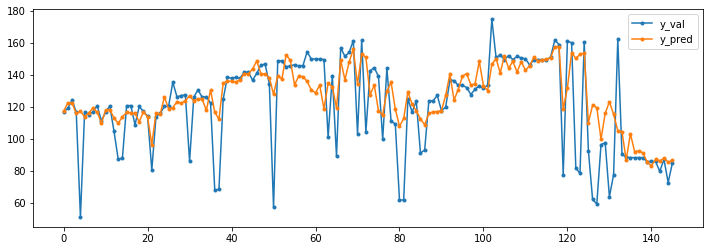

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 236.052


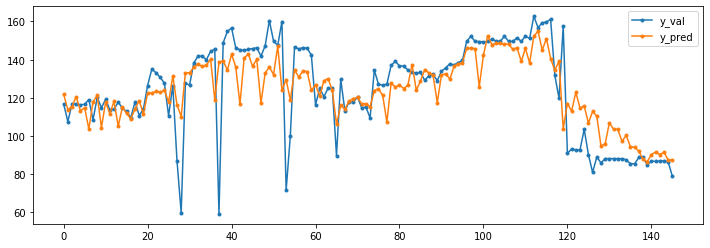

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 264.42


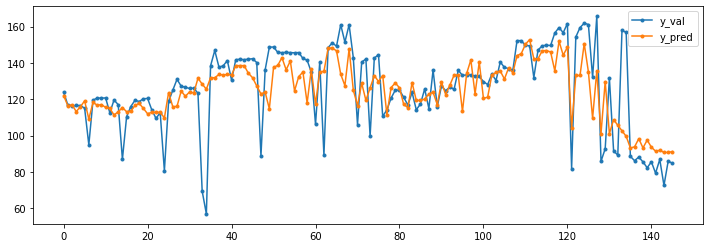

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 184.325


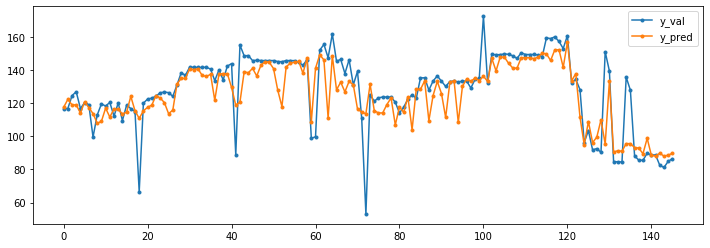

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's l2: 140.147


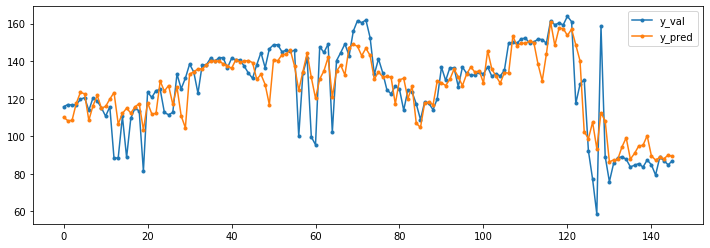

train column :  smp_max
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 401.185


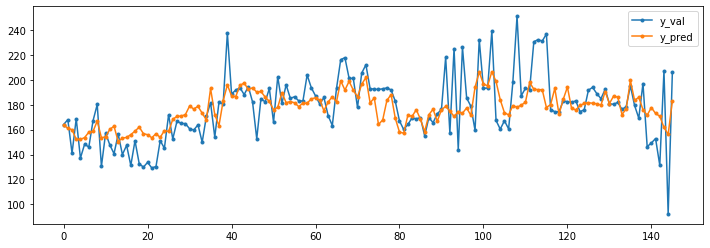

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's l2: 306.148


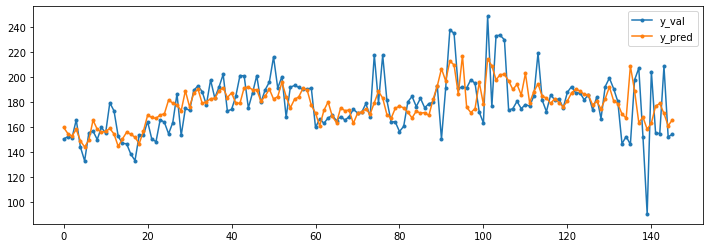

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's l2: 242.685


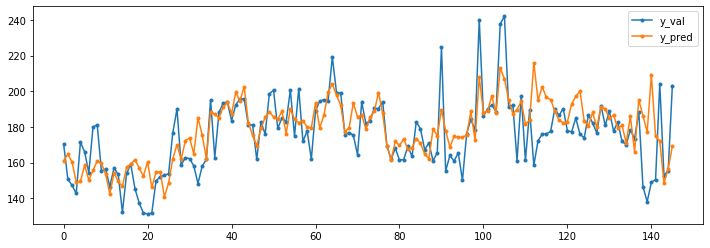

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's l2: 1478.19


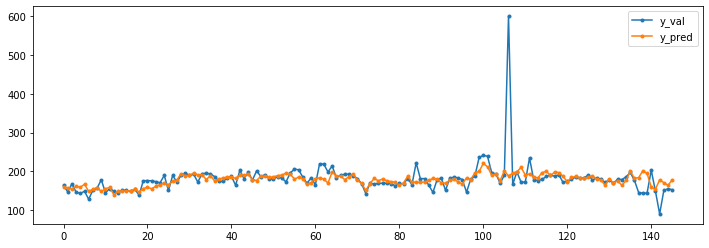

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 747.133


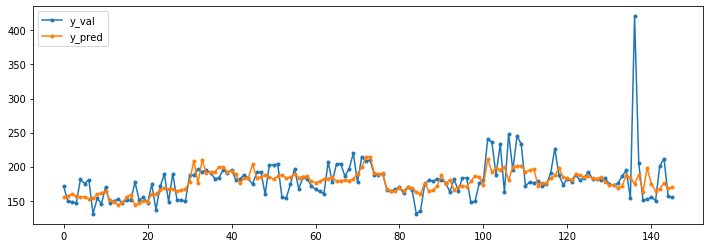

train column :  smp_mean
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[146]	valid_0's l2: 65.8951


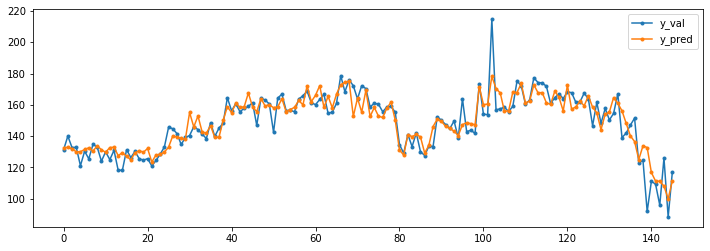

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[88]	valid_0's l2: 68.6491


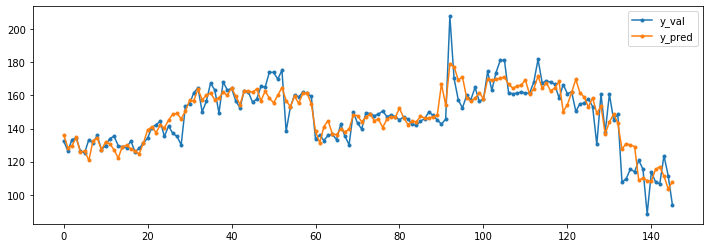

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's l2: 60.5549


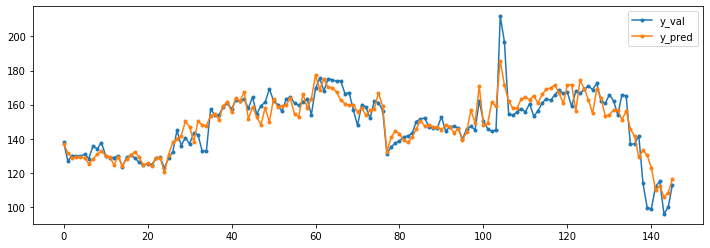

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[118]	valid_0's l2: 86.0354


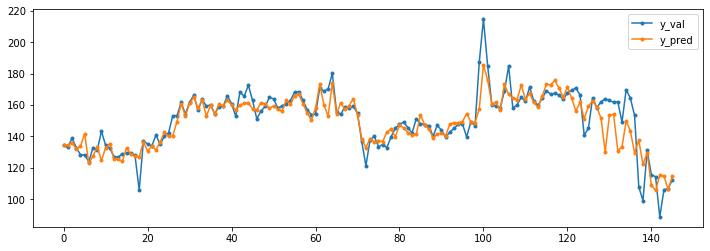

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[130]	valid_0's l2: 63.586


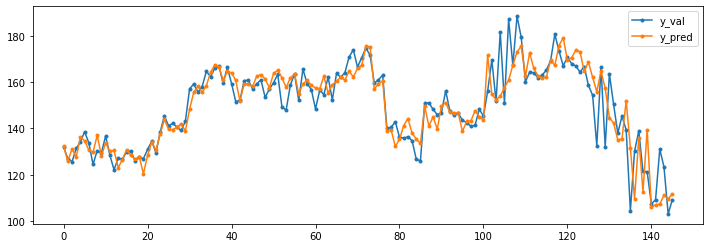

In [46]:
x_train = target.loc[:, ['supply', 'year', 'month', 'day', 'dayofweek', 'temp_max', 'temp_min', 'temp_mean']]
y_train = target.loc[:, ['smp_min', 'smp_max', 'smp_mean' ]]

smp_models = {}
for label in y_train.columns:
    print('train column : ', label)
    smp_models[label] = create_model(x_train, y_train[label])
    print('==========================================================================')

In [47]:
x_test = test.loc[:,['supply', 'year', 'month', 'day', 'dayofweek', 'temp_max', 'temp_min', 'temp_mean']]
for label in ['smp_min', 'smp_max', 'smp_mean']:
    preds = []
    for i in range(5):
        preds.append(smp_models[label][i].predict(x_test))
    pred = sum(preds)/len(preds)
    test[label] = pred

In [48]:
submission.loc[:, ['smp_min', 'smp_max', 'smp_mean', 'supply']] = test.loc[:,['smp_min', 'smp_max', 'smp_mean', 'supply']]
submission = pd.concat([submission, submission_bottom_half], axis = 0)
submission

,date,smp_max,smp_min,smp_mean,supply
0,2020-02-07,165.493193,88.709063,109.913042,82.496569
1,2020-02-08,162.320987,88.971404,111.244159,79.046389
2,2020-02-09,160.520007,88.570945,111.018134,79.981998
3,2020-02-10,163.032641,89.408701,108.968641,80.963087
4,2020-02-11,160.857398,87.068646,103.995566,77.377770
5,2020-02-12,166.862852,88.036351,107.140419,77.728650
6,2020-02-13,167.196096,89.482493,110.955854,81.920374
7,2020-02-14,164.297739,89.573868,109.946148,79.702642
8,2020-02-15,164.463899,89.746163,108.988141,81.617514
9,2020-02-16,159.168406,87.676457,103.536302,77.173154


In [49]:
submission.to_csv('Dacon_baseline.csv', index=False)